<a href="https://colab.research.google.com/github/marcellels/dsrepo/blob/master/Analisando_os_Dados_do_Airbnb_Munique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Análise dos Dados do Airbnb: **Munique - Alemanha**

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="15%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook* serão analisados os dados referentes à cidade de Munique, na Alemanha. O principal objetivo é ver quais insights podem ser extraídos a partir de dados brutos.**

<center><img alt="Munique" width="60%" src="https://images.unsplash.com/photo-1577462281852-279bf4986f7b?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=750&q=80"></center>

Capital da Bavaria, Munique é a terceira maior cidade da Alemanha e a 12ª maior cidade da União Europeia. 

Munique é ainda o berço da *Oktoberfest* e possui aproximadamente 1,5 milhão de habitantes distribuidos por 25 bairros. Com um verão de temperaturas agradáveis e um inverno frio, com maior incidência de neve comparado a outras cidades da Alemanha, a cidade tem muito a oferecer: restaurantes, museus, parques, os famosos *Biergarten* e muitas outras opções que atraem turistas de todas as partes do mundo.



## Obtenção dos Dados
Os dados utilizados neste estudo foram obtidos através do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, apenas o arquivo referenciado abaixo foi utilizado:

* `listings.csv` - *Summary information and metrics for listings in Munich (good for visualisations).*

In [9]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [10]:
# importar o arquivo listings.csv para um DataFrame
df=pd.read_csv("http://data.insideairbnb.com/germany/bv/munich/2020-05-24/visualisations/listings.csv")


## Análise dos Dados

Nesta seção, será apresentado o passo-a-passo da análise dos dados.

Primeiramente, no entanto, é feita uma breve explanação das informações que constam no *dataset*, de modo a auxiliar a compreensão do leitor.

**Dicionário das variáveis**

* `id` - Número de identificação do imóvel
* `name` - Nome da propriedade anunciada
* `host_id` - Número de identificaçaõ do proprietário (anfitrião)
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - Grupo ao qual o bairro pertence
* `neighbourhood` - Nome do bairro
* `latitude` - Coordenada da latitude da propriedade
* `longitude` - Coordenada da longitude da propriedade
* `room_type` - Tipo de quarto oferecido
* `price` - Preço para alugar o imóvel em euros
* `minimum_nights` - Quantidade mínima de noites para reservar o imóvel
* `number_of_reviews` - Número de avaliações que a propriedade possui
* `last_review` - Data da última avaliação recebida
* `reviews_per_month` - Quantidade de avaliações recebidas por mês
* `calculated_host_listings_count` - Quantidade de imóveis do mesmo anfitrião
* `availability_365` - Número de dias em que o imóvel está disponível dentro de 365 dias

Para ter uma visão mais clara de como estas informações estão distribuídas no *dataset* que está sendo utilizado, a seguir são apresentadas suas cinco primeiras entradas.

In [11]:
# mostrar as 5 primeiras entradas
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,36720,"Beautiful 2 rooms flat, Glockenbach",158413,Gabriela,NaN,Ludwigsvorstadt-Isarvorstadt,48.13057,11.56929,Entire home/apt,95,2,25,2017-07-22,0.34,1,0
1,49309,Sublet - Apartment with Balcony in Downtown (1),224802,Damien,NaN,Ludwigsvorstadt-Isarvorstadt,48.12456,11.55567,Private room,40,14,40,2017-10-15,0.34,1,330
2,97945,Deluxw-Apartm. with roof terrace,517685,Angelika,NaN,Hadern,48.11476,11.48782,Entire home/apt,80,2,131,2019-10-03,1.24,2,59
3,114695,Apartment Munich/East with sundeck,581737,Stephan,NaN,Berg am Laim,48.11923,11.63726,Entire home/apt,95,2,53,2019-10-06,0.49,2,117
4,127383,City apartment next to Pinakothek,630556,Sonja,NaN,Maxvorstadt,48.15198,11.56486,Entire home/apt,120,2,84,2020-03-01,0.77,2,0


### **1. Número de atributos (variáveis) e entradas do conjunto de dados e identificação dos tipos das variáveis**

A partir deste ponto, será iniciada a análise de fato. Para compreender melhor o conjunto de dados que está sendo utilizado, primeiramente são identificadas as quantidades de entradas e variáveis que o *dataset* possui, bem como qual o tipo destas variáveis.

In [12]:
# identificar o volume de dados do DataFrame
print("Entradas:\t{}".format(df.shape[0]))
print("Variáveis:\t{}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset (avaliar os tipos das variáveis)
display(df.dtypes)


Entradas:	11128
Variáveis:	16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **2. Porcentagem de valores ausentes no *dataset***

De modo a verificar a qualidade do *Dataset*, se mostra necessário avaliar a quantidade de valores ausentes para cada variável.



In [13]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
((df.isnull().sum()/df.shape[0])*100).sort_values(ascending=False)

neighbourhood_group               100.000000
reviews_per_month                  24.155284
last_review                        24.155284
name                                0.179727
host_name                           0.062904
availability_365                    0.000000
calculated_host_listings_count      0.000000
number_of_reviews                   0.000000
minimum_nights                      0.000000
price                               0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_id                             0.000000
id                                  0.000000
dtype: float64

Através desta análise, pode-se perceber que:
* A variável `neighbourhood_group` possui 100% dos seus valores faltantes;
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em cerca de 24% de suas linhas;
* As variáveis `name` e `host_name` possuem menos de 1% de valores nulos.

### **3. Distribuição das variáveis** 

Para fazer uma breve avaliação e identificar a distribuição das variáveis, são plotados seus histogramas.

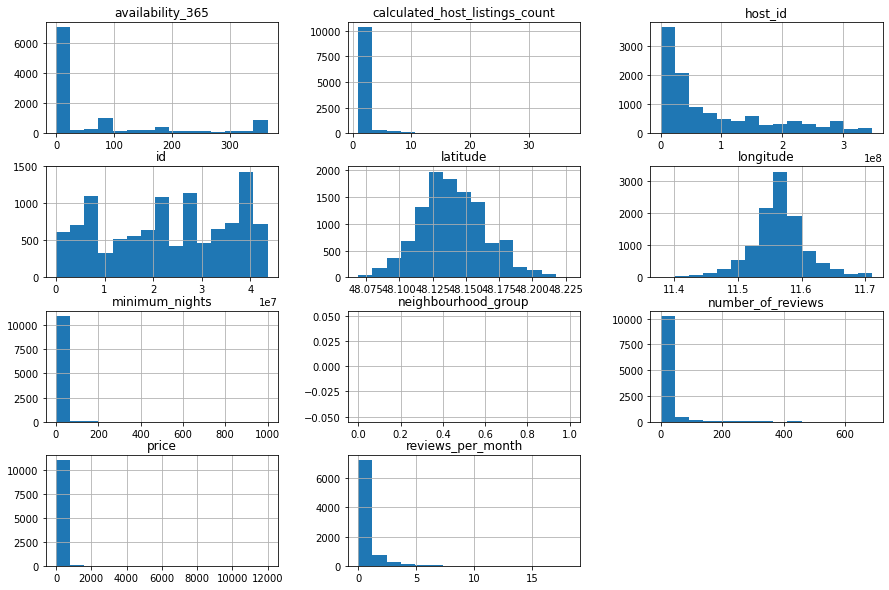

In [14]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));


### **4. Avaliação dos *outliers***

Ao plotar os histogramas, fica claro que existem *outliers* no conjunto de dados em uso. Observe, por exemplo, o gráfico referente à variável `price`. Neste caso, temos uma distorção acentuada na representação gráfica.
Para que estes *outliers* não interfiram na análise que está sendo desenvolvida, é necessário removê-los do *dataset*.

Antes disso, no entanto, é preciso fazer uma avaliação mais profunda para detectar estes pontos problemáticos e isto será feito de duas formas distintas:
* Resumo estatístico por meio do método `describe()`;
* Utilizando `boxplots` para as variáveis.

In [15]:
# ver o resumo estatístico das variáveis numéricas
df[['price','minimum_nights','number_of_reviews','reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,11128.000000,11128.000000,11128.000000,8440.000000,11128.000000,11128.000000
mean,116.282980,5.764019,15.348311,0.659962,1.884795,71.005661
std,215.328893,26.748270,40.639613,1.076235,3.433225,115.214642
min,8.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,52.000000,1.000000,1.000000,0.120000,1.000000,0.000000
50%,80.000000,2.000000,3.000000,0.300000,1.000000,0.000000
75%,127.250000,3.000000,12.000000,0.730000,1.000000,90.000000
max,12000.000000,1000.000000,688.000000,18.260000,37.000000,365.000000


Observando o resumo estatístico acima, é possível confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 127,25, porém seu valor máximo é de 12.000,00;
* Existem dados onde a quantidade mínima de noites (`minimum_nights`) requeridas está acima de 365 dias no ano.

#### Boxplot para *price*

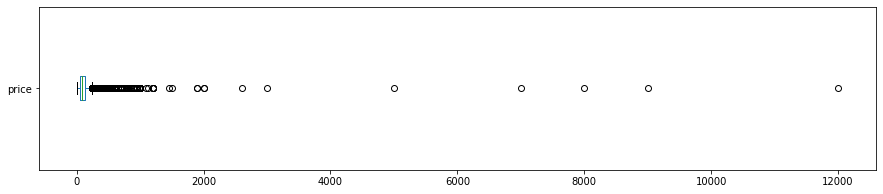


price: valores acima de 400
245 entradas
2.2017%


In [16]:
# plotar boxplot para price
df.price.plot(kind='box', vert=False, figsize=(15,3),)
plt.show()

# ver quantidade de valores acima de 400,00 para price
print("\nprice: valores acima de 400")
print("{} entradas".format(len(df[df.price>400])))
print("{:.4f}%".format((len(df[df.price>400])/df.shape[0])*100))


#### Boxplot para *minimum_nights*

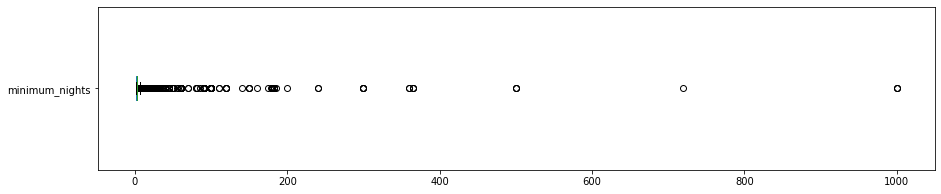

minimum_nights: valores acima de 20
491 entradas
4.4123%


In [17]:
# plotar boxplot para minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# ver quantidade de valores acima de 20 dias para minimum_nights
print("minimum_nights: valores acima de 20")
print("{} entradas".format(len(df[df.minimum_nights > 20])))
print("{:.4f}%".format((len(df[df.minimum_nights > 20]) / df.shape[0])*100))

#### Histograma sem *outliers*
Confirmados os *outliers* nas variáveis `price` e `minimum_nights`, se procede com a retirada dos mesmos fazendo uma limpeza no *DataFrame* destas variáveis. Em seguida, os histogramas são plotados novamente para uma nova avaliação.

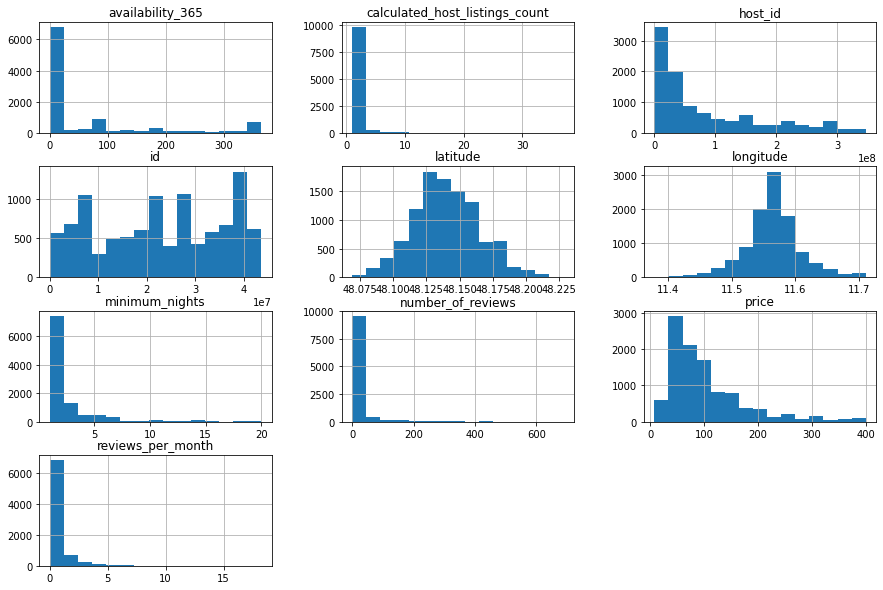

In [18]:
# remover os outliers em um novo DataFrame
df_clean=df.copy()
df_clean.drop(df_clean[df_clean.price > 400].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 20].index,axis=0, inplace=True)

# remover neighbourhood_group, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **5. Correlação existente entre as variáveis**
Com uma distribuição mais coerente, é interessante analisar se existe correlação entre as variáveis. Para isto, avalia-se a relação ou semelhança entre duas variáveis, assim como a intensidade de suas correlações.

Para obter os resultados será necessário:

* Criar uma matriz de correlação;
* Gerar um *heatmap* a partir desta matriz, utilizando a biblioteca `seaborn`.

In [19]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.061549,-0.097977,-0.094040,0.010136,0.048241
minimum_nights,-0.061549,1.000000,-0.085446,-0.116477,-0.009735,-0.013868
number_of_reviews,-0.097977,-0.085446,1.000000,0.750246,0.144661,0.201869
reviews_per_month,-0.094040,-0.116477,0.750246,1.000000,0.185191,0.212381
calculated_host_listings_count,0.010136,-0.009735,0.144661,0.185191,1.000000,0.175210
availability_365,0.048241,-0.013868,0.201869,0.212381,0.175210,1.000000


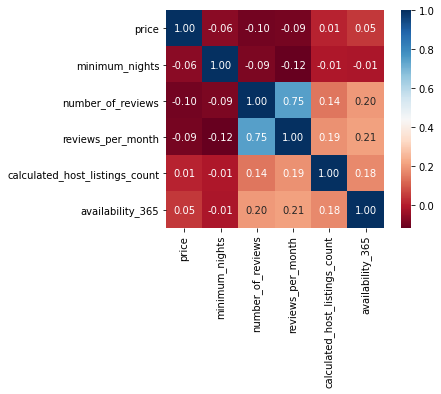

In [20]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);


Ao se avaliar o resultado, não se percebe nenhuma correlação relevante neste *dataset*.

### **6. Distribuição dos tipos de imóveis no Airbnb em Munique**
Uma informação muito importante para turistas ao visitar uma outra cidade ou país é o tipo de acomodação que irão utilizar durante o período.

Neste *dataset*, esta informação está indicada na coluna da variável `room_type`. As opções disponíveis são apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outra(s) pessoa(s).

A seguir, é feita a contagem da quantidade de ocorrências de cada tipo de aluguel na cidade de Munique, utilizando o método `value_counts()`.

In [21]:
# mostrar a quantidade de cada tipo de imóvel disponível em Munique
df_clean.room_type.value_counts()

Entire home/apt    5702
Private room       4465
Shared room         175
Hotel room           54
Name: room_type, dtype: int64

In [22]:
# mostrar a porcentagem de cada tipo de imóvel disponível
(df_clean.room_type.value_counts()/df_clean.shape[0])*100

Entire home/apt    54.848018
Private room       42.949211
Shared room         1.683340
Hotel room          0.519431
Name: room_type, dtype: float64

### **7. Preço do aluguel conforme a localidade**

Outro fator importante a se considerar ao visitar uma cidade turística, é o preço que irá se pagar dependendo da localização do imóvel. 

Para determinar o preço médio de locação em função dos bairros da cidade de Munique, será utilizada a função `groupby()`, conforme pode ser visualizado a seguir.



In [23]:
# ver preço médio por bairro
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Altstadt-Lehel                  131.887006
Schwanthalerhöhe                120.165025
Ludwigsvorstadt-Isarvorstadt    118.493750
Maxvorstadt                     106.740705
Tudering-Riem                   103.385965
Au-Haidhausen                   101.843049
Sendling                        101.618357
Schwabing-West                  100.707633
Neuhausen-Nymphenburg            99.986130
Sendling-Westpark                98.294833
Name: price, dtype: float64

Para garantir que o resultado não contêm distorções devido a uma amostragem não-representativa, será efetuado um teste nos três primeiros bairros mais caros da relação.

In [24]:
# ver quantidade de imóveis em Altstadt-Lehel
print(df_clean[df_clean.neighbourhood == "Altstadt-Lehel"].shape)

(354, 15)


In [25]:
# ver quantidade de imóveis em Schwanthalerhöhe
print(df_clean[df_clean.neighbourhood == "Schwanthalerhöhe"].shape)

(406, 15)


In [26]:
# ver quantidade de imóveis em Ludwigsvorstadt-Isarvorstadt
print(df_clean[df_clean.neighbourhood == "Ludwigsvorstadt-Isarvorstadt"].shape)

(1120, 15)


Como a representatividade se mostrou satisfatória, através dos dados de latitude e longitude de cada imóvel disponibilizados no *dataset*, é interessante, por fim, avaliar a distribuição das propriedades na cidade.

Observação: considerou-se x=longitude e y=latitude.

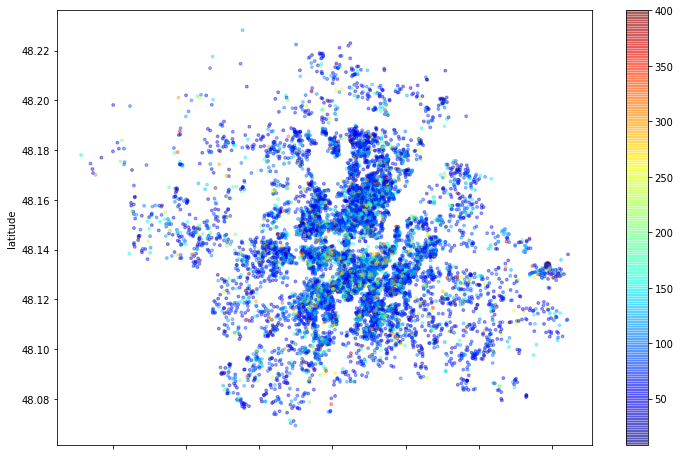

In [27]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusões


Neste estudo, foi realizada apenas uma análise superficial da base de dados do **Airbnb** referente a cidade de **Munique**, porém já foi possível perceber que existem *outliers* em algumas das variáveis. Sem uma avaliação mais aprofundada destes "pontos fora da curva", pode-se acabar tirando conclusões precipitadas errôneas.

Outro ponto que pôde ser confirmado se refere aos bairros mais caros para se hospedar na cidade. Na relação obtida (item 7), constam os bairros mais importantes e, logo, mais visados pelos turistas, seja por seu conteúdo histórico, artístico, gastronômico ou mesmo pela sua vida noturna. 

Por fim, é importante observar que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Para uma análise exploratória mais completa, se recomenda utilizar o conjunto de dados completos, com 106 atributos disponíveis.